# Business Problem: 
***Get insights from the dataset of No-Churn Telecom, to find out why the more Customers are leaving the company than expected and what can be done to improve the current situation***

# Objective: 
- In this notebook we explore the Raw Data collected from No-Churn_Telecom_Europe_renamed.xlsx and try perform some *Data preprocessing techniques**.

**Data preprocessing is a technique that involves transforming raw data into an understandable format that can be sent through our machine learning model for preditions.**

### Why we need this?
- We can't run a alogorithm without coverting the Raw Data to more understanable Format.

Steps in Data Preprocessing

Step 1 : Import the libraries

Step 2 : Import the data-set

Step 3 : Check Missing Values and Removing redundant variable if any

Step 4 : Checking for categorical Data and Data Transformation

Step 5 : Feature Engineering

Step 6 : Save the Processed data for further analysis and modeling

# Step 1 : Import the libraries

In [1]:
!pip install sqlalchemy
!pip install pymysql

In [1]:
# Import the libraries
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #andas is for data manipulation and analysis. 
import matplotlib.pyplot as plt #Matplotlib is a Python 2D plotting library which produces publication quality figures.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

In [2]:
from sqlalchemy import create_engine

# Step 2 : Import the data-set

In [3]:
#DataBase Details:
#SQL database
DB_Name= 'project_telecom'
Table_Name= 'telecom_churn_data'
Host= '18.136.56.185'
Username= 'dm_team3'
Password= 'dm_team15119#'

In [4]:
conn = create_engine('mysql+pymysql://'+Username+':'+Password+'@'+Host+'/'+DB_Name)
conn.table_names()

['telecom_churn_data']

In [ ]:
query = 'select * from telecom_churn_data'
df_raw = pd.read_sql(query,conn)
print(df_raw.shape)
df_raw.head()

In [6]:
# Change the column names as per Meta Info of Data
df_raw.columns =['State',
'Account_Length',
'Area_Code',
'Phone',
'International_Plan',
'VMail_Plan',
'VMail_Message',
'Day_Mins' ,
'Day_Calls' ,
'Day_Charge' ,
'Eve_Mins' ,
'Eve_Calls',
'Eve_Charge' ,
'Night_Mins' ,
'Night_Calls',
'Night_Charge' ,
'International_Mins',
'International_calls' ,
'International_Charge',
'CustServ_Calls',
'churn']

In [7]:
df_raw.head(1)

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.


In [8]:
#Using Pandas Library save this renamed data to excel for further easy retrieval
df_raw.to_excel("No-Churn_Telecom_Europe_renamed.xlsx",index=False)

In [14]:
#pd.set_option('display.height', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_raw = pd.read_excel('No-Churn_Telecom_Europe_renamed.xlsx')
print(df_raw.shape)
df_raw.head()

(4617, 21)


,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Step 3 : Check Missing Values

In [1]:
df_raw.isnull().any().sum()

NameError: name 'df_raw' is not defined

# Step 4 : Checking for categorical Data and Data Transformation

In [16]:
obj_df = df_raw.select_dtypes(include=['object']).copy()
print(obj_df.shape)
obj_df.head()

(4617, 5)


,State,Phone,International_Plan,VMail_Plan,churn
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


In [17]:
# Converting ["Area_Code"] into categorical feature, since its
df_raw["Area_Code"] = df_raw["Area_Code"].replace({415:"415",408:"408",510:"510"})

In [18]:
obj_df = df_raw.select_dtypes(include=['object']).copy()
print(obj_df.shape)
print(obj_df.columns)
obj_df.head(2)

(4617, 6)
Index(['State', 'Area_Code', 'Phone', 'International_Plan', 'VMail_Plan',
       'churn'],
      dtype='object')


,State,Area_Code,Phone,International_Plan,VMail_Plan,churn
0,KS,415,382-4657,no,yes,False.
1,OH,415,371-7191,no,yes,False.


In [19]:
num_df = df_raw.select_dtypes(exclude=['object']).copy()
print(num_df.shape)
print(num_df.columns)
num_df.head(2)

(4617, 15)
Index(['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_calls', 'International_Charge', 'CustServ_Calls'],
      dtype='object')


,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1


In [20]:
from scipy import stats
def Data_table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [21]:
Data_table(obj_df)

Dataset Shape: (4617, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,State,object,0,51,KS,OH,NJ
1,Area_Code,object,0,3,415,415,415
2,Phone,object,0,4617,382-4657,371-7191,358-1921
3,International_Plan,object,0,2,no,no,no
4,VMail_Plan,object,0,2,yes,yes,no
5,churn,object,0,2,False.,False.,False.


### **Key Observations:**

**Categorical data **

-  Binary data: **['International Plan ', 'VMail Plan', 'churn']** are binary in nature and nominal in nature, we can easily map 0 and 1.


-  Ordinal data : There is no ordinal data present here


- Nominal data : Nominal value is a variable that has no numerical importance,such as  ['State ', 'Phone ']
['State'] has 51 unique values and  ['Phone '] has 4617 unique values(means this dataset consists of all different phone numbers)
-  customers Phone number is like customers' ID, it has no preditive power.Hence, we can remove it.

In [22]:
# Since customers Phone number is like customers' ID, it has no preditive power.Hence, we can remove it
df_raw = df_raw.drop(['Phone'],axis=1)

In [23]:
# dictionary to map the feature
General_dict = {' True.':1, ' False.':0, ' yes':1, ' no':0}

# Maping the category values in our dict
df_raw['International_Plan'] = df_raw['International_Plan'].map(General_dict)
df_raw['VMail_Plan'] = df_raw['VMail_Plan'].map(General_dict)
df_raw['churn'] = df_raw['churn'].map(General_dict)

In [24]:
col = ['Area_Code']
print(f'Shape before dummy transformation: {df_raw.shape}')
df_raw = pd.get_dummies(df_raw, columns=col,
                    drop_first=True)
print(f'Shape after dummy transformation: {df_raw.shape}')

Shape before dummy transformation: (4617, 20)
Shape after dummy transformation: (4617, 21)


In [25]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [26]:
df_raw['State']=label_encoder.fit_transform(df_raw['State'])

In [28]:
print(df_raw.shape)
df_raw.head()

(4617, 21)


,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,churn,Area_Code_415,Area_Code_510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


# Step 5 : Feature Engineering
- 1. **Making Derived Variable** --> In this process we are going to derived Features from the existing features,that have more information for our Target variable i.e PerformanceRatings
- 2. **Feature Scaling** ----> We check wheather we need Scaling of Variables or not.
- 3. **Feature Importance(Selection)**---> we use Decesion Tree to find top 3 feature for desicding one.s PerformanceRatings

## Making Derived Variable:

In [29]:
cols = list(df_raw.columns.values)
cols.pop(cols.index('churn')) #Remove b from list
df_raw=df_raw[cols+['churn']] #Create new dataframe with columns in the order you want

In [30]:
corr_mat = df_raw.corr()

In [31]:
sorted(corr_mat['churn'])

[-0.11014910691970546,
 -0.09688438183273965,
 -0.0458436444996478,
 -0.010732620428495975,
 -0.006670885105318874,
 0.001942881261836244,
 0.010978695918671042,
 0.01232443837093917,
 0.016267797010604376,
 0.01804596333797335,
 0.043260021671580724,
 0.04326249423004541,
 0.06472777857949727,
 0.06473117638029362,
 0.08703573763320055,
 0.08704227240745747,
 0.20243435138353735,
 0.20243867308179955,
 0.20935061212449332,
 0.25752373424968533,
 1.0]

In [32]:
corr_mat[corr_mat.churn>0.1]['churn']

International_Plan    0.257524
Day_Mins              0.202439
Day_Charge            0.202434
CustServ_Calls        0.209351
churn                 1.000000
Name: churn, dtype: float64

In [33]:
corr_mat[corr_mat.churn<-0.1]['churn']

VMail_Plan   -0.110149
Name: churn, dtype: float64

### **Key Observations:**
- International_Plan,Day_Mins,Day_Charge ,CustServ_Calls seems to have relatively strong positive correlation with out Target i.e churn that others.
- VMail_Plan seems to have relatively strong negative correlation with out Target i.e churn that others.
- Let try to make derived variables that have Total Calls,Total charges,Total mins and try to bin CustServ_Calls & Account_Length feautre

In [34]:
# Function to add 
def add_total(a, b, c, d): 
    return a + b + c + d

#### 1. Derived Feature: from All_call_mins

In [35]:
df_raw['Total_call_mins'] = df_raw.apply(lambda row :  add_total(row['Day_Mins'], 
                                                                 row['Eve_Mins'], row['Night_Mins'],row['International_Mins']), axis = 1) 

C:\Users\shabd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
corr_mat1 = df_raw.corr()

In [37]:
corr_mat1[corr_mat1.churn>0.1]['churn']

International_Plan    0.257524
Day_Mins              0.202439
Day_Charge            0.202434
CustServ_Calls        0.209351
churn                 1.000000
Total_call_mins       0.198725
Name: churn, dtype: float64

#### 2. Derived Feature: from All_calls

In [38]:
df_raw['Total_calls'] = df_raw.apply(lambda row :  add_total(row['Day_Calls'], 
                                                                 row['Eve_Calls'], row['Night_Calls'],row['International_calls']), axis = 1)

C:\Users\shabd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
corr_mat2 = df_raw.corr()

In [40]:
corr_mat2[corr_mat2.churn>0.1]['churn']

International_Plan    0.257524
Day_Mins              0.202439
Day_Charge            0.202434
CustServ_Calls        0.209351
churn                 1.000000
Total_call_mins       0.198725
Name: churn, dtype: float64

#### 3. Derived Feature:  From Total_call_charges

In [41]:
df_raw['Total_charges'] = df_raw.apply(lambda row :  add_total(row['Day_Charge'], 
                                                                 row['Eve_Charge'], row['Night_Charge'],row['International_Charge']), axis = 1)

C:\Users\shabd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
corr_mat3 = df_raw.corr()

In [43]:
corr_mat3[corr_mat3.churn>0.1]['churn']

International_Plan    0.257524
Day_Mins              0.202439
Day_Charge            0.202434
CustServ_Calls        0.209351
churn                 1.000000
Total_call_mins       0.198725
Total_charges         0.229438
Name: churn, dtype: float64

#### 4. Derived Feature:  from Customer-Service-Calls

In [44]:
def cust_service_call(df) :
    
    if df["CustServ_Calls"] < 4 :
        return 0
    else:
        return 1


In [45]:
df_raw["CustServ_Calls_cat"] = df_raw.apply(lambda df_raw:cust_service_call(df_raw),
                                      axis = 1)

C:\Users\shabd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
corr_mat4 = df_raw.corr()

In [47]:
corr_mat4[corr_mat4.churn>0.1]['churn']

International_Plan    0.257524
Day_Mins              0.202439
Day_Charge            0.202434
CustServ_Calls        0.209351
churn                 1.000000
Total_call_mins       0.198725
Total_charges         0.229438
CustServ_Calls_cat    0.308566
Name: churn, dtype: float64

#### 5. Derived Feature:  from Account_Length

In [48]:
#Tenure to categorical column
def tenure_group(telcom) :
    
    if telcom["Account_Length"] <= 28 :
        return "Acc_lenght_0-28"
    elif (telcom["Account_Length"] > 28) & (telcom["Account_Length"] <= 56 ):
        return "Acc_lenght_28-56"
    elif (telcom["Account_Length"] > 56) & (telcom["Account_Length"] <= 84) :
        return "Acc_lenght_56-84"
    elif (telcom["Account_Length"] > 84) & (telcom["Account_Length"] <= 112) :
        return "Acc_lenght_84-112"
    elif telcom["Account_Length"] > 112 :
        return "Acc_lenght_gt_112"

In [49]:
df_raw["Acc_lenght_group"] = df_raw.apply(lambda df_raw: tenure_group(df_raw),axis = 1)

C:\Users\shabd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
# Importing categorical options of pandas
from pandas.api.types import CategoricalDtype 

# seting the orders of our ordinal features
tenure_group = CategoricalDtype(categories=["Acc_lenght_0-28", "Acc_lenght_28-56","Acc_lenght_56-84", 
                                     "Acc_lenght_84-112", "Acc_lenght_gt_112"], ordered=True)

In [51]:
# Transforming ordinal Features
df_raw.Acc_lenght_group  = df_raw.Acc_lenght_group.astype(tenure_group)

C:\Users\shabd\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
#Let's Check
df_raw.Acc_lenght_group

0       Acc_lenght_gt_112
1       Acc_lenght_84-112
2       Acc_lenght_gt_112
3        Acc_lenght_56-84
4        Acc_lenght_56-84
              ...        
4612     Acc_lenght_56-84
4613    Acc_lenght_gt_112
4614     Acc_lenght_56-84
4615    Acc_lenght_84-112
4616    Acc_lenght_gt_112
Name: Acc_lenght_group, Length: 4617, dtype: category
Categories (5, object): [Acc_lenght_0-28 < Acc_lenght_28-56 < Acc_lenght_56-84 < Acc_lenght_84-112 < Acc_lenght_gt_112]

In [53]:
d = dict(enumerate(df_raw.Acc_lenght_group.cat.categories))
d

{0: 'Acc_lenght_0-28',
 1: 'Acc_lenght_28-56',
 2: 'Acc_lenght_56-84',
 3: 'Acc_lenght_84-112',
 4: 'Acc_lenght_gt_112'}

- **Ok, now it's ordered and we can get the codes that corresponds to each value in the nominal feature**

In [54]:
# Geting the codes of ordinal categoy's 
df_raw.Acc_lenght_group = df_raw.Acc_lenght_group.cat.codes

In [55]:
df_raw.Acc_lenght_group

0       4
1       3
2       4
3       2
4       2
       ..
4612    2
4613    4
4614    2
4615    3
4616    4
Name: Acc_lenght_group, Length: 4617, dtype: int8

In [56]:
corr_mat5= df_raw.corr()

In [57]:
corr_mat5[corr_mat5.churn>0.01]['churn']

State                   0.010979
Account_Length          0.018046
International_Plan      0.257524
Day_Mins                0.202439
Day_Calls               0.016268
Day_Charge              0.202434
Eve_Mins                0.087042
Eve_Charge              0.087036
Night_Mins              0.043262
Night_Charge            0.043260
International_Mins      0.064731
International_Charge    0.064728
CustServ_Calls          0.209351
Area_Code_510           0.012324
churn                   1.000000
Total_call_mins         0.198725
Total_charges           0.229438
CustServ_Calls_cat      0.308566
Acc_lenght_group        0.019646
Name: churn, dtype: float64

In [58]:
corr_mat5[corr_mat5.churn<-0.01]['churn']

VMail_Plan            -0.110149
VMail_Message         -0.096884
International_calls   -0.045844
Area_Code_415         -0.010733
Name: churn, dtype: float64

In [59]:
cols = list(df_raw.columns.values)
cols.pop(cols.index('churn')) #Remove b from list
df_raw=df_raw[cols+['churn']] #Create new dataframe with columns in the order you want

In [60]:
print(df_raw.shape)
df_raw.head(3)

(4617, 26)


,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Area_Code_415,Area_Code_510,Total_call_mins,Total_calls,Total_charges,CustServ_Calls_cat,Acc_lenght_group,churn
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,717.2,303.0,75.56,0,4,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,625.2,332.0,59.24,0,3,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,539.4,333.0,62.29,0,4,0


## 2. Feature Scaling ----> We check wheather we need Scaling of Variables or not.
**Why and Where to Apply Feature Scaling?**


Real world dataset contains features that highly vary in magnitudes, units, and range. The algorithms which use Euclidean Distance measure are sensitive to Magnitudes. Here feature scaling helps to weigh all the features equally.
Since we are not going to apply any  algorithms which use Euclidean Distance measure, We don't need Feature Scaling as of now

## 3. Feature Importance(Selection)---> 

**Why to perform feature selection before modeling our data?**
- *Reduces Overfitting:* Less redundant data means less opportunity to make decisions based on noise.
- *Improves Accuracy:* Less misleading data means modeling accuracy improves.
- *Reduces Training Time:* fewer data points reduce algorithm complexity and algorithms train faster.

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Create train and test splits
target_name = 'churn'
X = df_raw.drop('churn', axis=1)

y=df_raw[target_name]

In [62]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs        Score
5             Day_Mins  3055.100135
20     Total_call_mins  2442.091906
4        VMail_Message  1019.757912
7           Day_Charge   519.329000
8             Eve_Mins   445.993054
22       Total_charges   438.713098
23  CustServ_Calls_cat   404.560774
2   International_Plan   276.614354
17      CustServ_Calls   220.546005
11          Night_Mins   110.011675


[0.02076058 0.01990034 0.07351171 0.03402894 0.01731691 0.07754687
 0.02002373 0.07846825 0.03152174 0.01936872 0.03089107 0.02290951
 0.02029363 0.02181896 0.0312889  0.03909902 0.03120186 0.03999813
 0.01118469 0.00882729 0.07883918 0.01913228 0.14364533 0.09399742
 0.01442494]


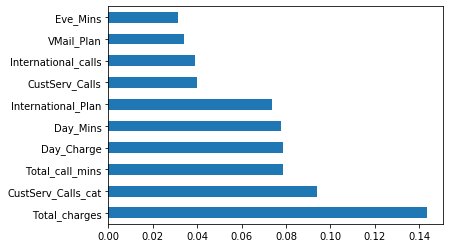

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [64]:
#!pip install plotly
# Import statements required for Plotly 
import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
#import plotly.tools as tls

In [65]:
df_raw.columns

Index(['State', 'Account_Length', 'International_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_calls', 'International_Charge',
       'CustServ_Calls', 'Area_Code_415', 'Area_Code_510', 'Total_call_mins',
       'Total_calls', 'Total_charges', 'CustServ_Calls_cat',
       'Acc_lenght_group', 'churn'],
      dtype='object')

In [66]:
# creating a list of only numerical values
numerical =['Account_Length', 'International_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_calls', 'International_Charge',
       'CustServ_Calls', 'Area_Code_415', 'Area_Code_510', 'hash_State',
       'Total_call_mins', 'Total_calls', 'Total_charges',
       'CustServ_Calls_cat', 'Acc_lenght_group', 'churn']
data = [
    go.Heatmap(
        z= df_raw[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df_raw[numerical].columns.values,
        y=df_raw[numerical].columns.values,
        colorscale='RdYlGn',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

KeyError: "['hash_State'] not in index"

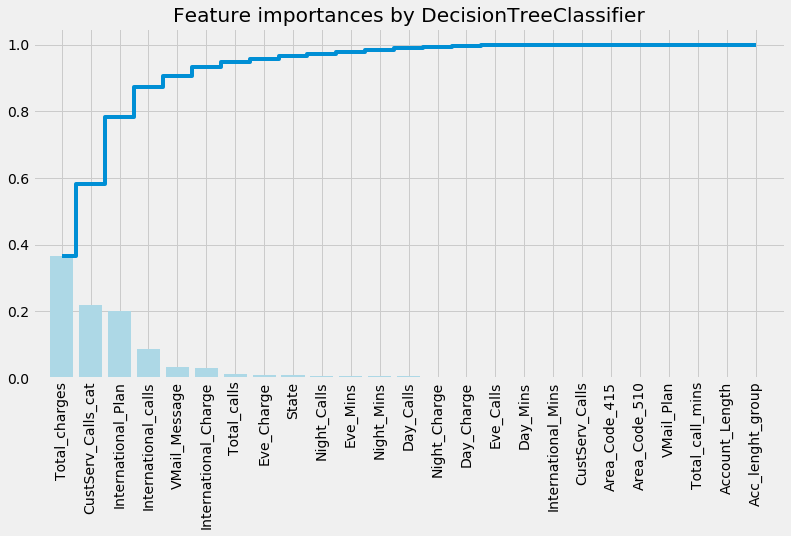

In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Create train and test splits
target_name = 'churn'
X = df_raw.drop('churn', axis=1)

y=df_raw[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df_raw.drop(['churn'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [68]:
df_raw.columns

Index(['State', 'Account_Length', 'International_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_calls', 'International_Charge',
       'CustServ_Calls', 'Area_Code_415', 'Area_Code_510', 'Total_call_mins',
       'Total_calls', 'Total_charges', 'CustServ_Calls_cat',
       'Acc_lenght_group', 'churn'],
      dtype='object')

In [69]:
df_derived = df_raw[['International_Plan', 'International_calls', 'International_Mins',
       'International_Charge', 'VMail_Plan', 'VMail_Message', 'Total_charges',
       'CustServ_Calls', 'churn']]

In [70]:
df_derived.columns

Index(['International_Plan', 'International_calls', 'International_Mins',
       'International_Charge', 'VMail_Plan', 'VMail_Message', 'Total_charges',
       'CustServ_Calls', 'churn'],
      dtype='object')

#### To Drop Features that have high correlations with eachother

In [71]:
corr_matrix= df_derived.corr().abs()
# Threshold for removing correlated variables
threshold = 0.90
# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 2 columns to remove.
['International_Charge', 'VMail_Message']


In [72]:
df_derived = df_derived.drop(columns = to_drop)
print('Training shape: ', df_derived.shape)

Training shape:  (4617, 7)


## Key Observations from all Four Method of Feature Importance/Selection:


Note: Out of Highly multi-correlated variable ,only those are selected which have more correlation with our Target Variable and don't help to increase the predicability power of our seleted model.
- Top 6 Factors that are strongly correlated with our Target Variable i.e**'churn'** are 
 1. 'International_Plan'
 2. 'International_calls'
 3. 'International_Mins'
 4. 'VMail_Plan'
 5.  'Total_charges'
 6. 'CustServ_Calls'
 
 Target = 'churn'

In [73]:
df_derived

,International_Plan,International_calls,International_Mins,VMail_Plan,Total_charges,CustServ_Calls,churn
0,0,3,10.0,1,75.56,1,0
1,0,3,13.7,1,59.24,1,0
2,0,5,12.2,0,62.29,0,0
3,1,7,6.6,0,66.80,2,0
4,1,3,10.1,0,52.09,3,0
...,...,...,...,...,...,...,...
4612,0,6,8.5,1,49.83,3,0
4613,0,1,15.7,1,69.49,3,0
4614,0,3,13.0,1,59.40,1,0
4615,0,3,14.3,1,59.26,0,0


# Step 6 : Save the Processed data for further analysis and modeling

In [74]:
#Using Pandas Library to do it
df_derived.to_excel("No-Churn_Telecom_Europe_processed_final01.xlsx",index=False)